In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
#from generate_simulation import *
import vclamp_evaluator_HMMtoHH as vcl_ev
import general_plotter as plotter
from generate_simulation import *
import eval_helper as eh
import curve_fitting as cf


#from deap import tools
evaluator = vcl_ev.Vclamp_evaluator_HMM('./csv_files/params_na12mut8st_mod_med.csv', 'Basis', 'na12mut8st', 'na16', objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope','tau0','peak_current','ttp'])
cp_file = './cp_best.pkl'
channel_name = 'na12mut8st'

##RBS you now need to check in the evaluator that you call peak_amp and TTP with the right ranges: [13,36?]

--No graphics will be displayed.


KeyError: 'persistent'

In [2]:
initial_params_list = [
    4.584982656184167e+01,
    2.393541665657613e-02,
    1.440952344322651e-02,
    8.847609128769419e-02,
    1.980838207143563e+01,
    2.217709530008501e-02,
    5.650174488683913e-01,
    6.108403283302217e-02,
    7.181189201089192e+01,
    6.593790601261940e-02,
    7.531178253431512e-01,
    3.647978133116471e-02,
    2.830146966213825e+00,
    2.890045633775495e-01,
    6.960300544163878e-02,
    5.757824421450554e-01,
    1.628407420157048e+02,
    2.680107016756367e-02,
    10,
    10,
    8000,
    1,
    1
]

In [5]:
csv_file = './csv_files/params_na12mut8st_mod_med.csv'
a = eh.read_params_range(csv_file)
cp_file = './cp_best.pkl'
channel_name = 'na12mut8st'

In [6]:
opt_data = pickle.load( open( cp_file, "rb" ) )

In [7]:
print(opt_data.keys())
hof = opt_data['halloffame']
log = opt_data['logbook']

dict_keys(['population', 'generation', 'parents', 'halloffame', 'history', 'logbook', 'rndstate'])


In [8]:
print(log)


gen	nevals	avg    	std        	min     	max        
1  	500   	795487 	1.11165e+06	59.1853 	4.13663e+06
2  	500   	807853 	1.13688e+06	59.1853 	4.13663e+06
3  	500   	224575 	644604     	59.1853 	4.13666e+06
4  	500   	122263 	482084     	51.4605 	2.09927e+06
5  	500   	74984.7	381125     	39.1624 	2.10889e+06
6  	500   	46408.9	300494     	32.3131 	2.09921e+06
7  	500   	44441.2	295584     	32.0108 	2.10881e+06
8  	500   	46332.5	300963     	34.5513 	2.10984e+06
9  	500   	31875.9	248270     	33.8186 	2.09954e+06
10 	500   	34159  	259176     	15.9419 	2.10882e+06
11 	500   	15409  	170644     	22.9964 	2.09968e+06
12 	500   	38230.3	288383     	28.9518 	4.13661e+06
13 	500   	15413.7	171353     	26.4003 	2.09887e+06
14 	500   	23545.8	213111     	26.4003 	2.09879e+06
15 	500   	11306.9	144563     	33.1904 	2.09901e+06
16 	500   	13290.5	158136     	19.8514 	2.09915e+06
17 	500   	27668.8	230956     	5.86544 	2.05097e+06
18 	500   	33353.8	256787     	5.86544 	2.10037e+06
19 	500   	2

In [9]:
def scale(val, src):
    """
    scale val in the 0,1 range when given lb and ub
    """
    return ((val - src[0]) / (src[1]-src[0])) 

In [10]:
csv_file = './csv_files/params_na12mut8st_mod_med.csv'

def get_place_in_range(opt_ps,csv_file,print_flg = False):
    p_names = []
    p_fact = []
    param_list = eh.read_params_range(csv_file)
    for ind,p_name in enumerate(param_list.keys()):
        tmp = param_list[p_name]
        lb = tmp[1]
        ub = tmp[2]
        fact = scale(opt_ps[ind],[lb,ub])
        p_names.append(p_name)
        p_fact.append(fact)
        if print_flg:
            print(f'{p_name} - lb:{lb} ub:{ub} val:{opt_ps[ind]} p:{fact}')
    return p_names,p_fact
    

In [11]:
best_hof = hof[0]
p = best_hof
print("Best params: " + str(best_hof))
print("[inact_err, act_err]: " + str(evaluator.evaluate_with_lists(best_hof)))
#print("Best invs list: " + str(best_indvs))

Best params: [9.620300982359241, 0.21993431832978777, 8.2339691150931, 0.09663441819856214, 380.8108084530479, 0.00045895494796917627, 3.48737541561204, 0.026220690361812977, 128.66054601004203, 0.013521969367008347, 83.01986699334272, 0.0008620403821080834, 0.07974238837154095, 0.8827668558090755, 0.11733441999281465, 5.487455056670334, 988.1231282210897, 0.03168072638749948, -18.806787951438174, -12.227199082887001, 28029.123465929326, 4.562304349720758, 10.430301316983911]


NameError: name 'evaluator' is not defined

In [12]:
pnames,pfactors = get_place_in_range(p,csv_file)

a1_0 - lb:0.0 ub:1000.0 val:9.620300982359241 p:0.00962030098235924
a1_1 - lb:0.0 ub:2.0 val:0.23996855060630146 p:0.11998427530315073
b1_0 - lb:0.0 ub:10.0 val:8.7068911717457 p:0.8706891171745699
b1_1 - lb:0.0177 ub:0.4424 val:0.06602261260521035 p:0.11378058065742959
a2_0 - lb:0.0 ub:1000.0 val:447.9238026974483 p:0.4479238026974483
a2_1 - lb:0.0 ub:0.1 val:0.0008020530399791628 p:0.008020530399791628
b2_0 - lb:0.113 ub:10.0 val:3.48737541561204 p:0.34129416563285525
b2_1 - lb:0.0 ub:0.1 val:0.0024389341836290896 p:0.024389341836290896
a3_0 - lb:0.0 ub:359.0595 val:155.36365431013778 p:0.4326961250437261
a3_1 - lb:0.0 ub:0.3297 val:0.01360097130062883 p:0.04125256688088817
b3_0 - lb:0.0 ub:100.0 val:83.01986699334272 p:0.8301986699334272
b3_1 - lb:0.0 ub:0.1 val:0.002860785122159694 p:0.02860785122159694
bh_0 - lb:0.0 ub:4.0 val:0.40103943656107016 p:0.10025985914026754
bh_1 - lb:0.0 ub:1.445 val:0.8097118214630509 p:0.5603542017045334
bh_2 - lb:0.0139 ub:0.348 val:0.103569400234888

[Text(0, 0, 'a1_0'),
 Text(0, 1, 'a1_1'),
 Text(0, 2, 'b1_0'),
 Text(0, 3, 'b1_1'),
 Text(0, 4, 'a2_0'),
 Text(0, 5, 'a2_1'),
 Text(0, 6, 'b2_0'),
 Text(0, 7, 'b2_1'),
 Text(0, 8, 'a3_0'),
 Text(0, 9, 'a3_1'),
 Text(0, 10, 'b3_0'),
 Text(0, 11, 'b3_1'),
 Text(0, 12, 'bh_0'),
 Text(0, 13, 'bh_1'),
 Text(0, 14, 'bh_2'),
 Text(0, 15, 'ah_0'),
 Text(0, 16, 'ah_1'),
 Text(0, 17, 'ah_2'),
 Text(0, 18, 'vShift'),
 Text(0, 19, 'vShift_inact'),
 Text(0, 20, 'maxrate'),
 Text(0, 21, 'ahfactor'),
 Text(0, 22, 'bhfactor')]

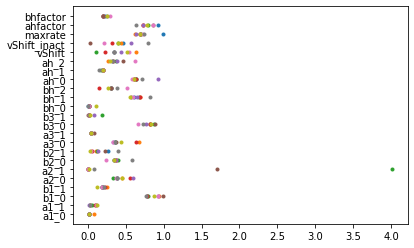

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
yaxis = range(len(pnames))
for p in hof[-10:-2]:
    pnames,pfactors = get_place_in_range(p,csv_file)
    ax.plot(pfactors,yaxis,'.')
pnames,pfactors = get_place_in_range(hof[-1],csv_file,True)
ax.plot(pfactors,yaxis,'.')
ax.set_yticks(yaxis)
ax.set_yticklabels(pnames)


In [ ]:
p = best_hof

In [ ]:
plotter.plot_inact(None, 'na16', False,p,'na12mut8st',True,"./Plots_Folder/jinan_testInact.pdf", "HMMtoHH")

In [ ]:
plotter.plot_act(None,'na16' , False,p,'na12mut8st',True,"./Plots_Folder/jinan_test.pdf", "HMMtoHH")

In [ ]:
print(best_hof)

# Test HH Target data

In [ ]:
wild_data = {}
# Getting objective base values for HH model.
is_HMM = False 
# Create genSim objects

act_obj = Activation_general(channel_name='na16')
tau0 = act_obj.get_Tau_0mV()
act_obj = Activation_general(channel_name='na16')
act_obj.genActivation()
peak_amp = act_obj.find_peak_amp([14, 33])
time_to_peak = act_obj.find_time_to_peak([14, 33])
gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)
inact_obj = Inactivation_general(channel_name='na16')
ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)
wild_data['v_half_act'] = v_half_act
wild_data['gv_slope'] = gv_slope
wild_data['v_half_ssi'] = v_half_inact
wild_data['ssi_slope'] = ssi_slope
wild_data['tau0'] = tau0
wild_data['peak_amp'] = peak_amp
wild_data['time_to_peak'] = time_to_peak
print(wild_data)



In [ ]:
sf = evaluator.score_calculator
print(evaluator.wild_data)

# Test Scoring

In [ ]:
errors = evaluator.evaluate_with_lists(best_hof)
print(errors)
print(sum(errors))

In [ ]:


objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope','tau0','peak_current','ttp']
act_obj = Activation_general(channel_name='na12mut8st')
inact_obj = Inactivation_general(channel_name='na12mut8st')
param_values = best_hof
eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=act_obj)
eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=inact_obj)


In [ ]:
sf.dv_half_act_diff
sf.gv_slope_diff

In [ ]:
objectives=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope','tau0','peak_current','ttp']
try:
    gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)
    ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)
    # y0, plateau, percent_fast, k_fast, k_slow = cf.calc_recov_obj(recov_obj)
    #print('gv_slope: ' + str(gv_slope))
    #print('v_half_act: ' + str(v_half_act))
    #print('ssi_slope: ' + str(ssi_slope))
    #print('v_half_inact: ' + str(v_half_inact))

except ZeroDivisionError:
    print('Zero Division Error************')
    error_val = []
    for i in range(len(objectives)):
        error_val.append(1000)


time_to_peak = act_obj.find_time_to_peak([14, 33])
peak_amp = act_obj.find_peak_amp([14, 33])
tau0 = act_obj.get_Tau_0mV()

errors = []
if 'v_half_act' in objectives:
    vhalf_act_error = sf.dv_half_act(sf.dv_half_act_diff, v_half_act)
    errors.append(vhalf_act_error)
if 'gv_slope' in objectives:
    gv_slope_error = sf.gv_slope(sf.gv_slope_diff, gv_slope)
    errors.append(gv_slope_error)
if 'v_half_ssi' in objectives:
    v_half_ssi_error = sf.dv_half_ssi(sf.dv_half_ssi_diff, v_half_inact)
    errors.append(v_half_ssi_error)
if 'ssi_slope' in objectives:
    ssi_slope_error = sf.ssi_slope(sf.ssi_slope_diff, ssi_slope)
    errors.append(ssi_slope_error)
if 'peak_current' in objectives:
    peak_amp_errors = sf.calc_peak_amp_err(act_obj)
    errors.append(peak_amp_errors)
if 'ttp' in objectives:
    time_to_peak_error = sf.calc_ttp_err(act_obj)
    errors.append(time_to_peak_error)
if 'tau0' in objectives:
    tau0_error = sf.calc_tau0_err(act_obj)
    errors.append(tau0_error)

In [ ]:
print(objective_names)
print(f" vhalf_act is: {v_half_act} WT:{wild_data['v_half_act']} error: {errors[0]}")
print(f" gv_slope is: {gv_slope} WT:{wild_data['gv_slope']} error: {errors[1]}")
print(f" v_half_ssi is: {v_half_inact} WT:{wild_data['v_half_ssi']} error: {errors[2]}")
print(f" ssi_slope is: {ssi_slope} WT:{wild_data['ssi_slope']} error: {errors[3]}")
print(f" peak_current is:\n {peak_amp} WT:\n{wild_data['peak_amp']} error: {errors[4]}")
print(f" ttp is:\n {time_to_peak} WT:\n{wild_data['time_to_peak']} error: {errors[5]}")
print(f" tau0 is: {tau0} WT:{wild_data['tau0']} error: {errors[6]}")


In [ ]:
np.sum([(time_to_peak[i] - wild_data['time_to_peak'][i]) for i in range(len(peak_amp))])


In [ ]:
print(act_obj.ipeak_vec)

In [ ]:
cf.calc_act_obj(act_obj)

In [ ]:
print(act_obj.ipeak_vec[12])

In [ ]:
i12 = act_obj.all_is[12]
print(i12[np.argmin(i12)])

In [ ]:
print(act_obj.t_vec[np.argmin(i12)])

In [ ]:
print(len(evaluator.wild_data['time_to_peak']))
print(evaluator.wild_data['time_to_peak'][14:33])

In [ ]:
print(best_hof)

In [ ]:
act_obj = Activation_general(channel_name='na12mut8st')
act_obj.genActivation()
time_to_peak = act_obj.find_time_to_peak([14,33])
time_to_peak_error = np.sum([np.abs(time_to_peak[i] - wild_data['time_to_peak'][i]) for i in range(len(peak_amp))])

In [ ]:
print(time_to_peak)

In [ ]:
print(evaluator.wild_data['time_to_peak'])


In [ ]:
act_obj = Activation_general(channel_name='na12mut8st')
eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=act_obj)
act_obj.clamp(0)

In [ ]:
act_obj.find_ipeaks()

In [ ]:
from generate_simulation import *
act_obj = Activation_general(channel_name='na12mut8st')
act_obj.genActivation()
import general_plotter as plotter

In [ ]:
plotter.plot_currents_general(act_obj,time_range = [5,25],v_range = [0,5],i_range = [-0.3,0])


In [ ]:
print(act_obj.all_is[0])

In [ ]:
v_mask = list(np.where(np.logical_and(act_obj.v_vec >= -10, act_obj.v_vec <=10))[0])

In [ ]:
print(v_mask)

In [ ]:
zero_ind = np.where(act_obj.v_vec == 0)[0][0]

In [ ]:
print(zero_ind)